# Plotting SnowSAR Images

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path

# Test should run from root
import os

os.chdir("..")

In [47]:
from omegaconf import OmegaConf
from multiearth.api import extract_assets
from multiearth.config import ConfigSchema

cfg = OmegaConf.load("config/nsidc-snowsar.yaml")
cfg_schema = OmegaConf.structured(ConfigSchema)
cfg = OmegaConf.merge(cfg_schema, cfg)

# Constrain the test to only pull one item and one band
for pvdr in cfg.providers:
    for coll in pvdr.collections:
        coll.max_items = 1

success = extract_assets(cfg)
print("Successfully extracted assets." if success else "Asset extraction failed.")

17:27:23 INFO - Extraction details for provider ProviderKey.EARTHDATA with collection SNEX17_SNOWSAR: 
id: SNEX17_SNOWSAR_RAW
assets:
- none
outdir: null
datetime: null
aoi_file: null
max_items: 1

17:27:23 INFO - Extraction details for provider ProviderKey.EARTHDATA with collection SNEX17_SNOWSAR_RAW: 
id: SNEX17_SNOWSAR_RAW
assets:
- none
outdir: null
datetime: null
aoi_file: null
max_items: 1

17:27:25 INFO - EarthData Provider returned 1 items for SNEX17_SNOWSAR for datetime 2017-02-16/2017-02-22
17:27:25 INFO - EarthData Provider returned 1 items for SNEX17_SNOWSAR_RAW for datetime 2017-02-16/2017-02-22
17:27:25 WARNING - SC:SNEX17_SnowSAR_Raw.001:177556456 has no asset none
17:27:25 INFO - 1 assets did not specify file size, will query size directly with http request (this may take a few moments)
system.query_asset_sizes=False can be used to disable this behavior
100%|██████████| 1/1 [00:00<00:00,  3.47it/s]
17:27:25 INFO - 

******************************************************

Successfully extracted assets.


Plot a sample image.

In [3]:
fpath = Path(cfg["default_collection"]["outdir"])
collection_for_nb = "SNEX17_SNOWSAR"
png_file = list((fpath /collection_for_nb).glob("**/*.png"))[0]

In [4]:
img = xr.DataArray(mpimg.imread(png_file), dims=["y", "x"])

Resize image since base images are large for notebooks.

In [44]:
resized_img = img.coarsen(x=5, y=5, boundary='trim').mean()

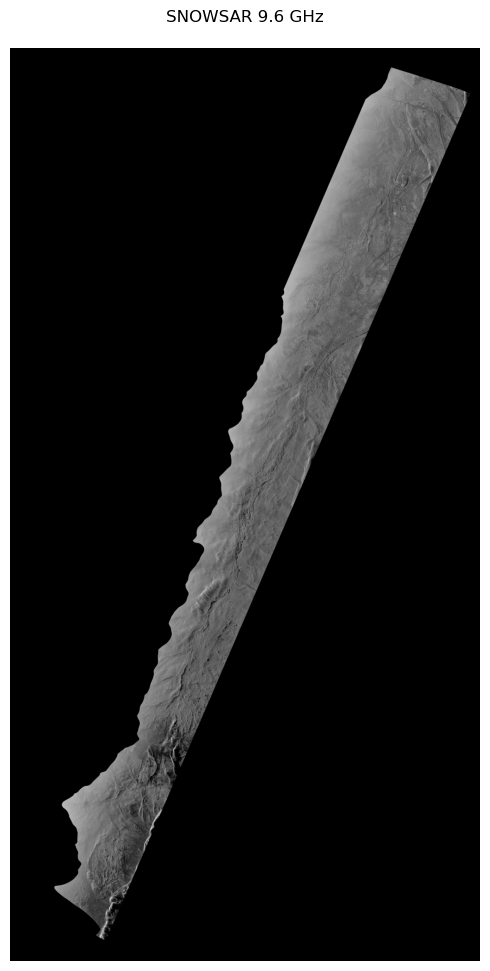

In [45]:
fig, ax = plt.subplots(figsize=(5, 10))
im = ax.imshow(resized_img, cmap="gray",)
ax.axis('off')

if '_9.6G_' in str(png_file):
    band = '9.6 GHz'
elif '_17.25G_' in str(png_file):
    band = '17.25 GHz'
fig.suptitle(f'SNOWSAR {band}')
fig.tight_layout()